------
# **Machine Learning Innovative Assignment**
### By : 
1. Vishva Patel **18bce260**
2. Chandni Tomar **18bce246** 
3. Hitanshu Shah **18bce217**
4. Rohini Singh **18bce228**

# **Title :** 
## ***Image classification on Chest X-rays to classify thoracic disease (bacterial and viral pneumonia) from normal X-rays*** 
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---

### The data is stored in a drive folder downloaded from kaggle dataset available online for free use.


---



In [ ]:
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import applications,Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import random

---
1. ### We are using Tensorflow library (2.0) with openCV for image pre processing and classification
2. ### os and shutil is used for file handling tasks
3. ### numpy and scipy is used for array handling and evaluation metrics respectively
---





In [ ]:


main_dir = '/content/drive/My Drive/projects/mlproject2'

base_dir = '/content/drive/My Drive/projects/mlproject2/chest'

train_dir = '/content/drive/My Drive/projects/mlproject2/chest/train'
test_dir = '/content/drive/My Drive/projects/mlproject2/chest/test'


train_normal_dir = '/content/drive/My Drive/projects/mlproject2/chest/train/normal'
train_pnemonia_dir = '/content/drive/My Drive/projects/mlproject2/chest/train/pnemonia'

test_normal_dir = '/content/drive/My Drive/projects/mlproject2/chest/test/normal'
test_pnemonia_dir = '/content/drive/My Drive/projects/mlproject2/chest/test/pnemonia'

train_dir_old = '/content/drive/My Drive/projects/mlproject/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
test_dir_old = '/content/drive/My Drive/projects/mlproject/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'




In [ ]:
'''
try:
  os.mkdir(main_dir)
  os.mkdir(base_dir)
  os.mkdir(train_dir)
  os.mkdir(test_dir)
  os.mkdir(train_normal_dir)
  os.mkdir(train_pnemonia_dir)
  os.mkdir(test_normal_dir)
  os.mkdir(test_pnemonia_dir)
except:
  pass

'''


---
# Some Images such as CT scans and overly cropped X-rays were noticed by us in the training and testing set and were removed by manual handpicking
---

Train outlier

'1-s2.0-S0929664620300449-gr3_lrg-a.jpg',
'1-s2.0-S0929664620300449-gr3_lrg-b.jpg',
'1-s2.0-S0929664620300449-gr3_lrg-c.jpg',
'1-s2.0-S0929664620300449-gr3_lrg-d.jpg',
'3ED3C0E1-4FE0-4238-8112-DDFF9E20B471.jpeg',
'4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg',
'6A7D4110-2BFC-4D9A-A2D6-E9226D91D25A.jpeg',
'21DDEBFD-7F16-4E3E-8F90-CB1B8EE82828.jpeg',
'44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg',
'35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg',
'191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg',
'396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg',
'5083A6B7-8983-472E-A427-570A3E03DDEE.jpeg',
'66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg',
'925446AE-B3C7-4C93-941B-AC4D2FE1F455.jpeg',
'DE488FE1-0C44-428B-B67A-09741C1214C0.jpeg',
'D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg',
'FC230FE2-1DDF-40EB-AA0D-21F950933289.jpeg',
'jkms-35-e79-g001-l-d.jpg',
'jkms-35-e79-g001-l-e.jpg',
'kjr-21-e24-g001-l-b.jpg',
'kjr-21-e24-g001-l-c.jpg',
'kjr-21-e24-g002-l-b.jpg',
'kjr-21-e24-g002-l-c.jpg',
'kjr-21-e24-g003-l-b.jpg',
'kjr-21-e24-g004-l-a.jpg',
'kjr-21-e24-g004-l-b.jpg',
'person407_virus_811.jpeg',
'person407_virus_812.jpeg',
'person407_virus_814.jpeg',
'person414_virus_845.jpeg',
'person421_virus_866.jpeg',
'person422_virus_867.jpeg',
'person422_virus_868.jpeg',
'person489_virus_995.jpeg',
'person514_virus_1031.jpeg',
'person542_bacteria_2276.jpeg',
'person636_bacteria_2527.jpeg',
'person804_bacteria_2711.jpeg',
'person909_virus_1565.jpeg',
'person980_virus_1655.jpeg',
'person1104_virus_1826.jpeg',
'person1684_bacteria_4461.jpeg',
'person1684_bacteria_4462.jpeg',
'person1689_bacteria_4474.jpeg',
'person1693_bacteria_4485.jpeg',
'person1706_bacteria_4516.jpeg',
'person1716_bacteria_4533.jpeg',
'person1719_bacteria_4541.jpeg',
'person1728_bacteria_4555.jpeg',
'person1728_bacteria_4556.jpeg',
'person1732_bacteria_4564.jpeg'



Test outlier

'person81_bacteria_397.jpeg',
'person81_bacteria_396.jpeg'

In [ ]:
'''
data_df = pd.read_csv('/content/drive/My Drive/projects/mlproject/Chest_xray_Corona_Metadata.csv')

train_outlier = ['1-s2.0-S0929664620300449-gr3_lrg-a.jpg', '1-s2.0-S0929664620300449-gr3_lrg-b.jpg', '1-s2.0-S0929664620300449-gr3_lrg-c.jpg', '1-s2.0-S0929664620300449-gr3_lrg-d.jpg', '3ED3C0E1-4FE0-4238-8112-DDFF9E20B471.jpeg', '4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg', '6A7D4110-2BFC-4D9A-A2D6-E9226D91D25A.jpeg', '21DDEBFD-7F16-4E3E-8F90-CB1B8EE82828.jpeg', '44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg', '35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg', '191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg', '396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg', '5083A6B7-8983-472E-A427-570A3E03DDEE.jpeg', '66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg', '925446AE-B3C7-4C93-941B-AC4D2FE1F455.jpeg', 'DE488FE1-0C44-428B-B67A-09741C1214C0.jpeg', 'D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg', 'FC230FE2-1DDF-40EB-AA0D-21F950933289.jpeg', 'jkms-35-e79-g001-l-d.jpg', 'jkms-35-e79-g001-l-e.jpg', 'kjr-21-e24-g001-l-b.jpg', 'kjr-21-e24-g001-l-c.jpg', 'kjr-21-e24-g002-l-b.jpg', 'kjr-21-e24-g002-l-c.jpg', 'kjr-21-e24-g003-l-b.jpg', 'kjr-21-e24-g004-l-a.jpg', 'kjr-21-e24-g004-l-b.jpg', 'person407_virus_811.jpeg', 'person407_virus_812.jpeg', 'person407_virus_814.jpeg', 'person414_virus_845.jpeg', 'person421_virus_866.jpeg', 'person422_virus_867.jpeg', 'person422_virus_868.jpeg', 'person489_virus_995.jpeg', 'person514_virus_1031.jpeg', 'person542_bacteria_2276.jpeg', 'person636_bacteria_2527.jpeg', 'person804_bacteria_2711.jpeg', 'person909_virus_1565.jpeg', 'person980_virus_1655.jpeg', 'person1104_virus_1826.jpeg', 'person1684_bacteria_4461.jpeg', 'person1684_bacteria_4462.jpeg', 'person1689_bacteria_4474.jpeg', 'person1693_bacteria_4485.jpeg', 'person1706_bacteria_4516.jpeg', 'person1716_bacteria_4533.jpeg', 'person1719_bacteria_4541.jpeg', 'person1728_bacteria_4555.jpeg', 'person1728_bacteria_4556.jpeg', 'person1732_bacteria_4564.jpeg']
test_outlier = ['person81_bacteria_397.jpeg', 'person81_bacteria_396.jpeg']

for index, row in data_df.iterrows():
  
  if row['Dataset_type'] == 'TRAIN':
    if row['X_ray_image_name'] not in train_outlier:
      if row['Label'] == 'Normal':
        shutil.copyfile(train_dir_old+"/"+row['X_ray_image_name'],train_normal_dir+"/"+row['X_ray_image_name']) 
      else :
        shutil.copyfile(train_dir_old+"/"+row['X_ray_image_name'],train_pnemonia_dir+"/"+row['X_ray_image_name']) 
  else :
    if row['X_ray_image_name'] not in test_outlier:
      if row['Label'] == 'Normal':
        shutil.copyfile(test_dir_old+"/"+row['X_ray_image_name'],test_normal_dir+"/"+row['X_ray_image_name']) 
      else :
        shutil.copyfile(test_dir_old+"/"+row['X_ray_image_name'],test_pnemonia_dir+"/"+row['X_ray_image_name']) 

'''

In [ ]:
train_normal_dir_list = os.listdir(train_normal_dir)
train_pnemonia_dir_list = os.listdir(train_pnemonia_dir)

test_normal_dir_list = os.listdir(test_normal_dir)
test_pnemonia_dir_list = os.listdir(test_pnemonia_dir)

print(len(train_normal_dir_list))
print(len(train_pnemonia_dir_list))
print(len(test_normal_dir_list))
print(len(test_pnemonia_dir_list))

1342
3915
234
388




---
### Preprocessing function where we use Otsu thresholding and that image is subtracted from the original image.

---




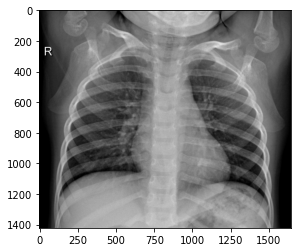

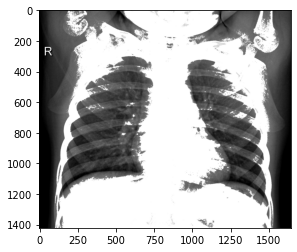

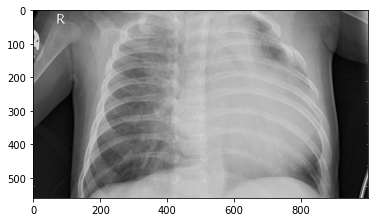

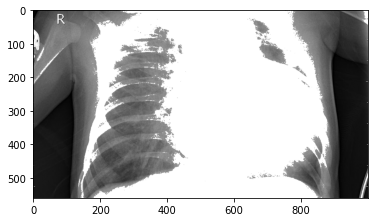

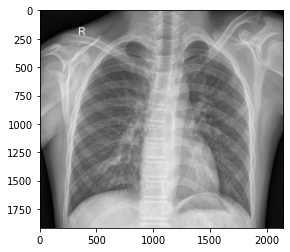

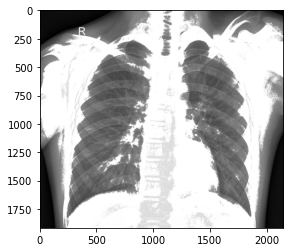

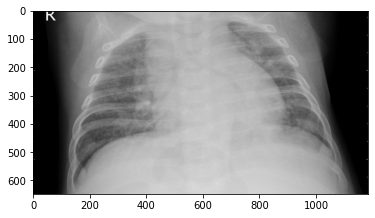

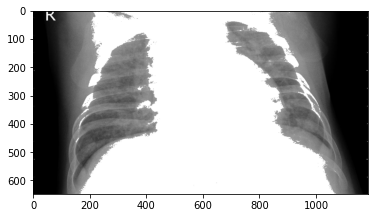

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random 


randomnum = random.randint(0,100)



def preprocess(img):
  img = cv2.cvtColor(np.uint8(img), cv2.COLOR_RGB2GRAY)
  img2 = img
  img2 = cv2.equalizeHist(img2.astype(np.uint8))
  ret, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_OTSU)
  finalimg = cv2.subtract(img2,img)
  ret, finalimg = cv2.threshold(finalimg, 0, 255,  cv2.THRESH_OTSU)
  finalimg = img2 + cv2.subtract(img,finalimg)
  return np.array(cv2.cvtColor(finalimg, cv2.COLOR_GRAY2RGB))/255.0


image = tf.keras.preprocessing.image.load_img(train_normal_dir+'/'+train_normal_dir_list[randomnum])
plt.imshow(image)
plt.show()
plt.imshow(preprocess(image))
plt.show()

image = tf.keras.preprocessing.image.load_img(train_pnemonia_dir+'/'+train_pnemonia_dir_list[randomnum])
plt.imshow(image)
plt.show()
plt.imshow(preprocess(image))
plt.show()


image = tf.keras.preprocessing.image.load_img(test_normal_dir+'/'+test_normal_dir_list[randomnum])
plt.imshow(image)
plt.show()
plt.imshow(preprocess(image))
plt.show()

image = tf.keras.preprocessing.image.load_img(test_pnemonia_dir+'/'+test_pnemonia_dir_list[randomnum])
plt.imshow(image)
plt.show()
plt.imshow(preprocess(image))
plt.show()


In [ ]:
#
def preprocess(img):
  img = cv2.cvtColor(np.uint8(img), cv2.COLOR_RGB2GRAY)
  img2 = img
  img2 = cv2.equalizeHist(img2.astype(np.uint8))
  ret, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_OTSU)
  finalimg = cv2.subtract(img2,img)
  ret, finalimg = cv2.threshold(finalimg, 0, 255,  cv2.THRESH_OTSU)
  finalimg = img2 + cv2.subtract(img,finalimg)
  return np.array(cv2.cvtColor(finalimg, cv2.COLOR_GRAY2RGB))/255.0



train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess,
        shear_range=0.1,
        rotation_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest'
      )


test_datagen = ImageDataGenerator(preprocessing_function=preprocess)

validationary_datagen = ImageDataGenerator(rescale = 1./255,)


train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(224, 224),  
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary')





Found 5257 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [ ]:
train_step = train_generator.samples//16
test_step = validation_generator.samples//16

---
1. ## We use tranfered learning with densenet 121 model and weights of a model trained with imagenet 
2. ## The input shape is 224,224,3 the default and recommended image dimension for densenet 121 and we are using avg pooling to use Grad CAMs with the mode
3. ## As the task is limited to binary classification we only use 1 class and one hot encoding is not used for classes
---

In [ ]:

pretrained_model = applications.DenseNet121(weights='imagenet', input_shape=(224,224,3), include_top=False,pooling= 'avg', classes=1)


29089792/29084464 [==============================] - 0s 0us/step


In [ ]:

last_output = pretrained_model.output
x = Flatten()(last_output)
x = Dense(1, activation='sigmoid')(x)
model_121 = Model(inputs = pretrained_model.input,outputs = x)


---
1. ### We used two different type of callbacks one for early stopping and the other for learning rate
2. ### we used Adam for optimization with its default and recommended learning rate and for every plateau of val loss with a patience of 3 epochs and then we reduce the learning rate by the factor of 10
3. ### We use early stopping with patience of 5 where we monitor the validation area under the curve and restores the best weights.
---

In [ ]:

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=5,
                                              verbose=1, min_delta=0.0001, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=3, min_lr=0.000001)

model_121.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history = model_121.fit(
      train_generator,
      steps_per_epoch=train_step,  
      epochs=50,
      validation_data=validation_generator,
      validation_steps=test_step,  
      callbacks= [es_callback,reduce_lr]
      )



Epoch 1/50
328/328 [==============================] - 2879s 9s/step - loss: 0.2580 - accuracy: 0.8916 - auc: 0.9479 - val_loss: 1.6960 - val_accuracy: 0.5164 - val_auc: 0.8877
Epoch 2/50
328/328 [==============================] - 132s 404ms/step - loss: 0.1894 - accuracy: 0.9239 - auc: 0.9705 - val_loss: 0.8833 - val_accuracy: 0.7401 - val_auc: 0.9295
Epoch 3/50
328/328 [==============================] - 135s 413ms/step - loss: 0.1759 - accuracy: 0.9309 - auc: 0.9741 - val_loss: 3.7110 - val_accuracy: 0.3783 - val_auc: 0.7018
Epoch 4/50
328/328 [==============================] - 137s 417ms/step - loss: 0.1883 - accuracy: 0.9244 - auc: 0.9705 - val_loss: 0.7099 - val_accuracy: 0.6875 - val_auc: 0.9365
Epoch 5/50
328/328 [==============================] - 138s 420ms/step - loss: 0.1664 - accuracy: 0.9353 - auc: 0.9763 - val_loss: 0.2067 - val_accuracy: 0.9391 - val_auc: 0.9706
Epoch 6/50
328/328 [==============================] - 139s 422ms/step - loss: 0.1620 - accuracy: 0.9353 - auc: 0

In [ ]:
model_121.evaluate(validation_generator,steps = test_step)

38/38 [==============================] - 7s 191ms/step - loss: 0.2018 - accuracy: 0.9408 - auc: 0.9717


[0.2018093466758728, 0.9407894611358643, 0.9716930389404297]

---
## Plot of validation accuracy vs traning accuracy
## Plot of validation loss vs training loss
---

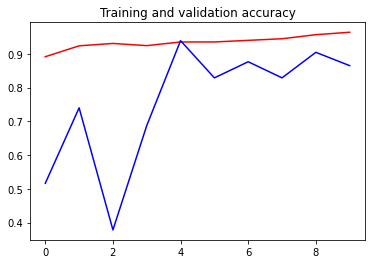

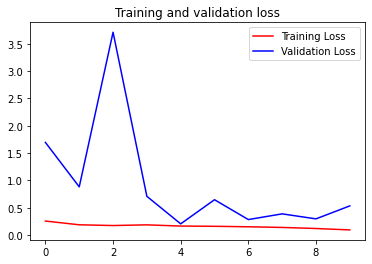

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_121.save('/content/drive/My Drive/projects/mlproject2/assets/final_model_121')



Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/projects/mlproject2/assets/final_model_121/assets


In [ ]:
prediction_x = []
real_x = []

for i in range(len(test_normal_dir_list)):
  image = tf.keras.preprocessing.image.load_img(test_normal_dir+'/'+test_normal_dir_list[i],target_size = (224,224))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = preprocess(image)
  image = np.expand_dims(image, axis=0)
  prediction = model_121.predict(image)
  real_x.append("normal")
  if prediction > 0.5 :
    prediction_x.append("pnemonia")
  else:
    prediction_x.append("normal")


for j in range(len(test_pnemonia_dir_list)):
  image = tf.keras.preprocessing.image.load_img(test_pnemonia_dir+'/'+test_pnemonia_dir_list[j],target_size = (224,224))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = preprocess(image)
  image = np.expand_dims(image, axis=0)
  prediction = model_121.predict(image)
  real_x.append("pnemonia")
  if prediction > 0.5 :
    prediction_x.append("pnemonia")
  else:
    prediction_x.append("normal")

---
# **Overall Accuracy of 94.05% achieved**
---

Confusion matrix, without normalization
[[212  22]
 [ 15 373]]
              precision    recall  f1-score   support

      normal       0.93      0.91      0.92       234
    pnemonia       0.94      0.96      0.95       388

    accuracy                           0.94       622
   macro avg       0.94      0.93      0.94       622
weighted avg       0.94      0.94      0.94       622

0.9405144694533762


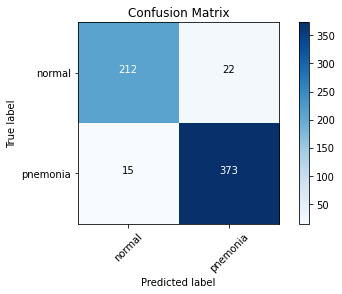

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_plot_labels = ['normal','pnemonia']
cm = confusion_matrix(real_x,prediction_x)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print(classification_report(real_x,prediction_x))
print(accuracy_score(real_x,prediction_x))

---
#### In Grad CAM or gradient class activation maps we use the gradients as the weight to generate the heatmap of the image and we overlay the heatmap on the X-ray image to give a better insight on the factors for which the prediction was made
---

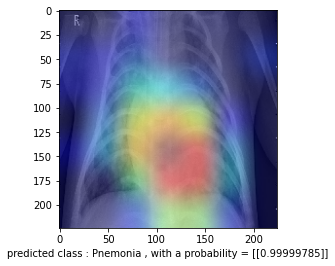

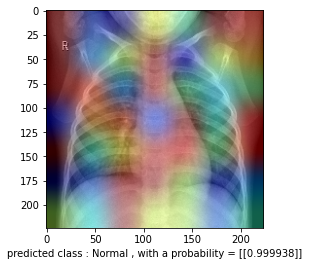

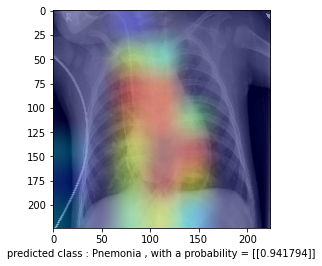

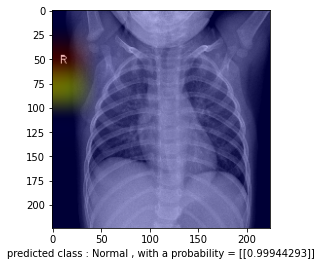

In [ ]:
import matplotlib.cm as cm





from google.colab.patches import cv2_imshow
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    return layer



def getcam(model,layername,image):
    class_weights = model.layers[-1].get_weights()[0]
    
    final_conv_layer = get_output_layer(model,layername)
    get_output = tf.keras.backend.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])
    [conv_outputs, predictions] = get_output([image])
    
    conv_outputs = conv_outputs[0, :, :, :]
    cam = np.zeros(dtype=np.float32, shape=(conv_outputs.shape[:2]))
    for i, w in enumerate(class_weights[:,0]):
      cam += w*conv_outputs[:, :, i]
    cammax = np.max(cam)
    return cam / cammax


def showheatmaprandom(norp):
  rn = random.randint(1,100)
  if norp == "normal":
    image = tf.keras.preprocessing.image.load_img(train_normal_dir+'/'+train_normal_dir_list[rn],target_size = (224,224))
  else:
    image = tf.keras.preprocessing.image.load_img(train_pnemonia_dir+'/'+train_pnemonia_dir_list[rn],target_size = (224,224))
  image2 = image
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = preprocess(image)
  image3 = image
  image = np.expand_dims(image, axis=0)
  prediction = model_121.predict(image)
  
  
  heatmap = getcam(model_121,'bn',image)
  heatmap[np.where(heatmap<0.1)] = 0
  heatmap = np.uint8(255 * heatmap)
  jet = cm.get_cmap("jet")
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]
  jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((224,224))
  jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
  image2 = tf.keras.preprocessing.image.img_to_array(image2)
  image3 = tf.keras.preprocessing.image.img_to_array(image3)
  superimposed_img = jet_heatmap * 0.6 + image2
  superimposed_img2 = jet_heatmap * 0.4 + image3
  superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
  superimposed_img2 = tf.keras.preprocessing.image.array_to_img(superimposed_img2)

  if prediction>0.5:
    buf = "predicted class : " + "Pnemonia , with a probability = " + str(prediction) 
  else:
    buf = "predicted class : " + "Normal , with a probability = " + str(1-prediction)
  plt.xlabel(buf)

  plt.imshow(superimposed_img)
  #plt.show()
  #plt.imshow(superimposed_img2)
  plt.show()

showheatmaprandom("Pnemonia")
showheatmaprandom("normal")
showheatmaprandom("Pnemonia")
showheatmaprandom("normal")

Found 5257 images belonging to 2 classes.
Found 622 images belonging to 2 classes.
Epoch 1/50
328/328 [==============================] - 132s 403ms/step - loss: 0.2425 - accuracy: 0.9046 - auc: 0.9536 - val_loss: 6.1698 - val_accuracy: 0.3931 - val_auc: 0.6279
Epoch 2/50
328/328 [==============================] - 130s 395ms/step - loss: 0.1716 - accuracy: 0.9296 - auc: 0.9753 - val_loss: 0.7822 - val_accuracy: 0.6595 - val_auc: 0.9699
Epoch 3/50
328/328 [==============================] - 129s 394ms/step - loss: 0.1444 - accuracy: 0.9460 - auc: 0.9824 - val_loss: 4.2095 - val_accuracy: 0.3931 - val_auc: 0.6453
Epoch 4/50
328/328 [==============================] - 130s 397ms/step - loss: 0.1272 - accuracy: 0.9517 - auc: 0.9866 - val_loss: 1.8070 - val_accuracy: 0.6201 - val_auc: 0.8055
Epoch 5/50
328/328 [==============================] - 130s 396ms/step - loss: 0.1474 - accuracy: 0.9409 - auc: 0.9810 - val_loss: 1.0168 - val_accuracy: 0.6793 - val_auc: 0.9425
Epoch 6/50
328/328 [=======

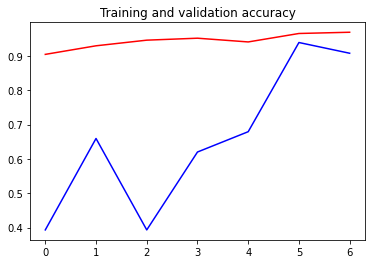

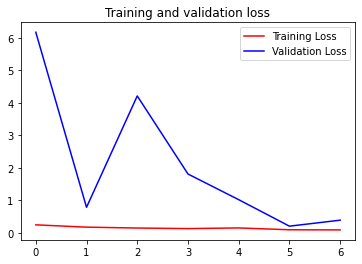

In [ ]:




train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=0.1,
        rotation_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest'
      )


test_datagen = ImageDataGenerator(rescale = 1./255)



train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(224, 224),  
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary')



train_step = train_generator.samples//16
test_step = validation_generator.samples//16

pretrained_model = applications.DenseNet121(weights='imagenet', input_shape=(224,224,3), include_top=False,pooling= 'avg', classes=1)
last_output = pretrained_model.output
x = Flatten()(last_output)
x = Dense(1, activation='sigmoid')(x)
model_comp = Model(inputs = pretrained_model.input,outputs = x)


es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=5,
                                              verbose=1, min_delta=0.0001, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=3, min_lr=0.000001)

model_comp.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history = model_comp.fit(
      train_generator,
      steps_per_epoch=train_step,  
      epochs=50,
      validation_data=validation_generator,
      validation_steps=test_step,  
      callbacks= [es_callback,reduce_lr]
      )


model_comp.evaluate(validation_generator,steps = test_step)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
